In [1]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno

from scipy.stats import shapiro

from scipy import stats
from scipy.stats import mannwhitneyu

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, precision_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline, FeatureUnion


import seaborn as sns
import re

import textblob
from unidecode import unidecode

pd.plotting.register_matplotlib_converters()
%matplotlib inline

In [2]:
"""Setting graph parameters"""
sns.set_theme(style='whitegrid')
sns.set_palette('rocket')

In [3]:
%load_ext autoreload
%autoreload 2
from help_tool import help_tool

# Data download and Cleaning

In [18]:
stroke_prediction=help_tool.csv_download(r"...\Module3\Sprint2\Code\archive\healthcare-dataset-stroke-data.csv")
stroke_prediction.head()

,Id,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
help_tool.first_look(stroke_prediction)

Column data types:
Id                     int64
Gender                object
Age                  float64
Hypertension           int64
Heart_disease          int64
Ever_married          object
Work_type             object
Residence_type        object
Avg_glucose_level    float64
Bmi                  float64
Smoking_status        object
Stroke                 int64
dtype: object

Dataset has 5110 observations and 12 features
Columns with NULL values: ['Bmi']
Dataset has 0 duplicates


In [21]:
stroke_prediction['Age']=stroke_prediction['Age'].astype(int)

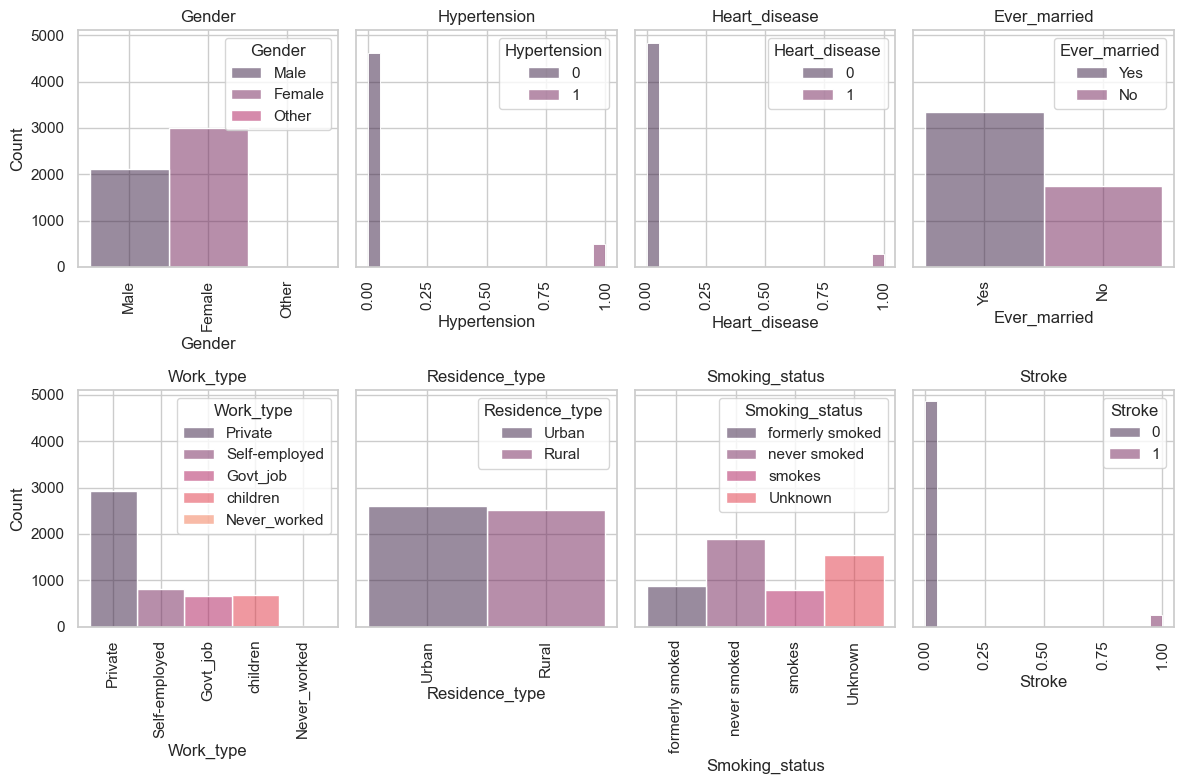

In [37]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8), sharey=True)

# Flatten axes since we have a 2x4 grid
axes = axes.flatten()

# List of variables to plot
hue_vars = ['Gender', 'Hypertension', 'Heart_disease', 'Ever_married', 'Work_type', 'Residence_type', 'Smoking_status', 'Stroke']

for j, hue_var in enumerate(hue_vars):
    sns.histplot(data=stroke_prediction, x=hue_var, kde=True, bins=20,
                    ax=axes[j], hue=hue_var, legend=True)
    axes[j].set_title(hue_var)  # Set title for each subplot
    axes[j].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

In [41]:
for i in ['Gender']:
    print(stroke_prediction[i].value_counts())

Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64


* 1 person with Gender 'Other'
* 22 never worked and 687 is 'children'

who are these people?
* non binary representation is 1 person and this row will be dropped

In [43]:
stroke_prediction[stroke_prediction['Gender']=='Other']

,Id,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
3116,56156,Other,26,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [57]:
stroke_data=stroke_prediction[stroke_prediction['Gender']!='Other']
stroke_data.drop(columns=['Id'], inplace=True)

C:\Users\Gintare\AppData\Local\Temp\ipykernel_12260\3942284780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data.drop(columns=['Id'], inplace=True)


Age


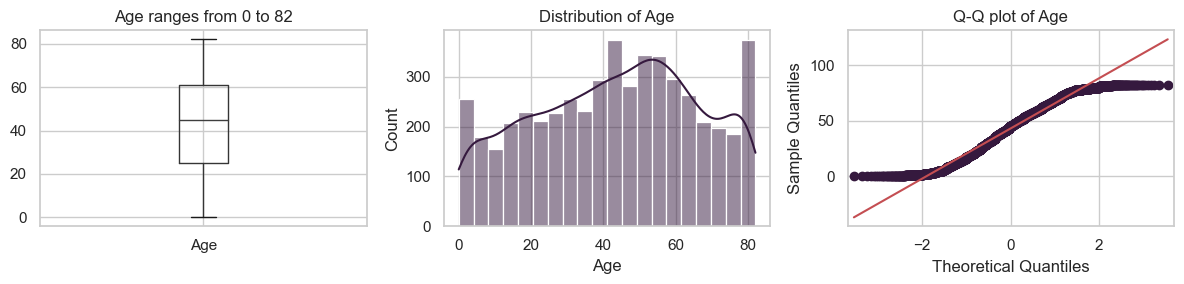

Avg_glucose_level


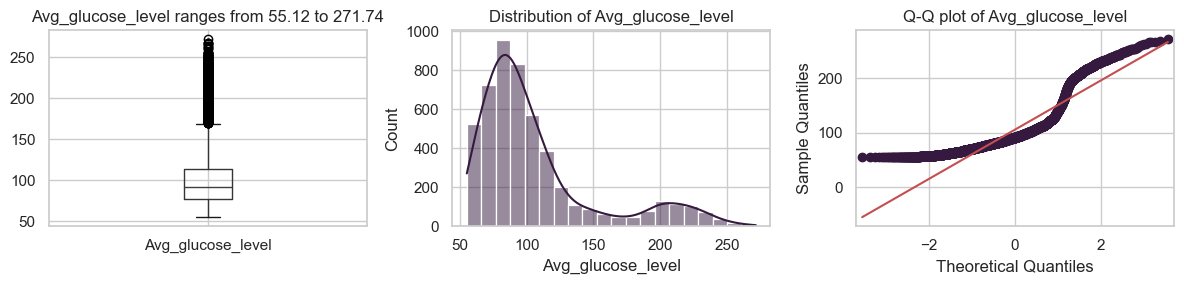

Bmi


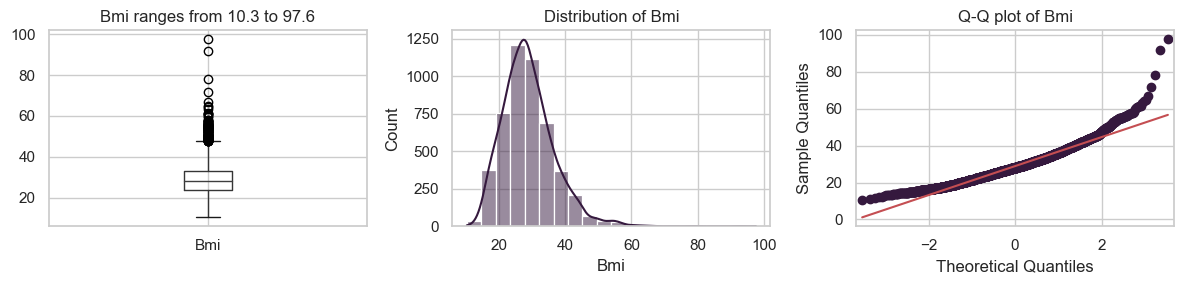

In [45]:
help_tool.distribution_check(
    stroke_data[['Gender', 'Age', 'Avg_glucose_level', 'Bmi']])

Age cleaning

IndexError: index 5 is out of bounds for axis 0 with size 5

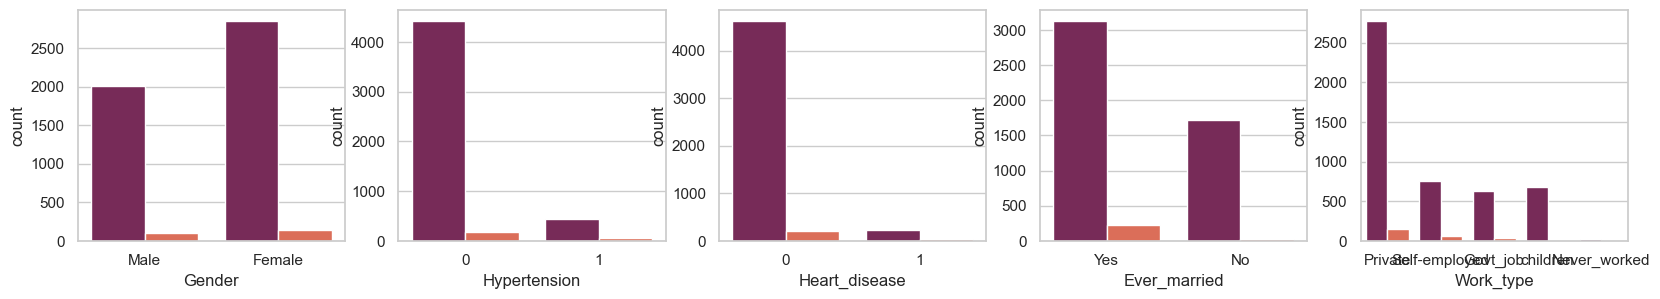

In [62]:
help_tool.countplot_per_feature(stroke_data, ['Gender', 'Hypertension', 'Heart_disease', 'Ever_married',
       'Work_type', 'Residence_type',
       'Smoking_status', 'Stroke'], hue='Stroke')

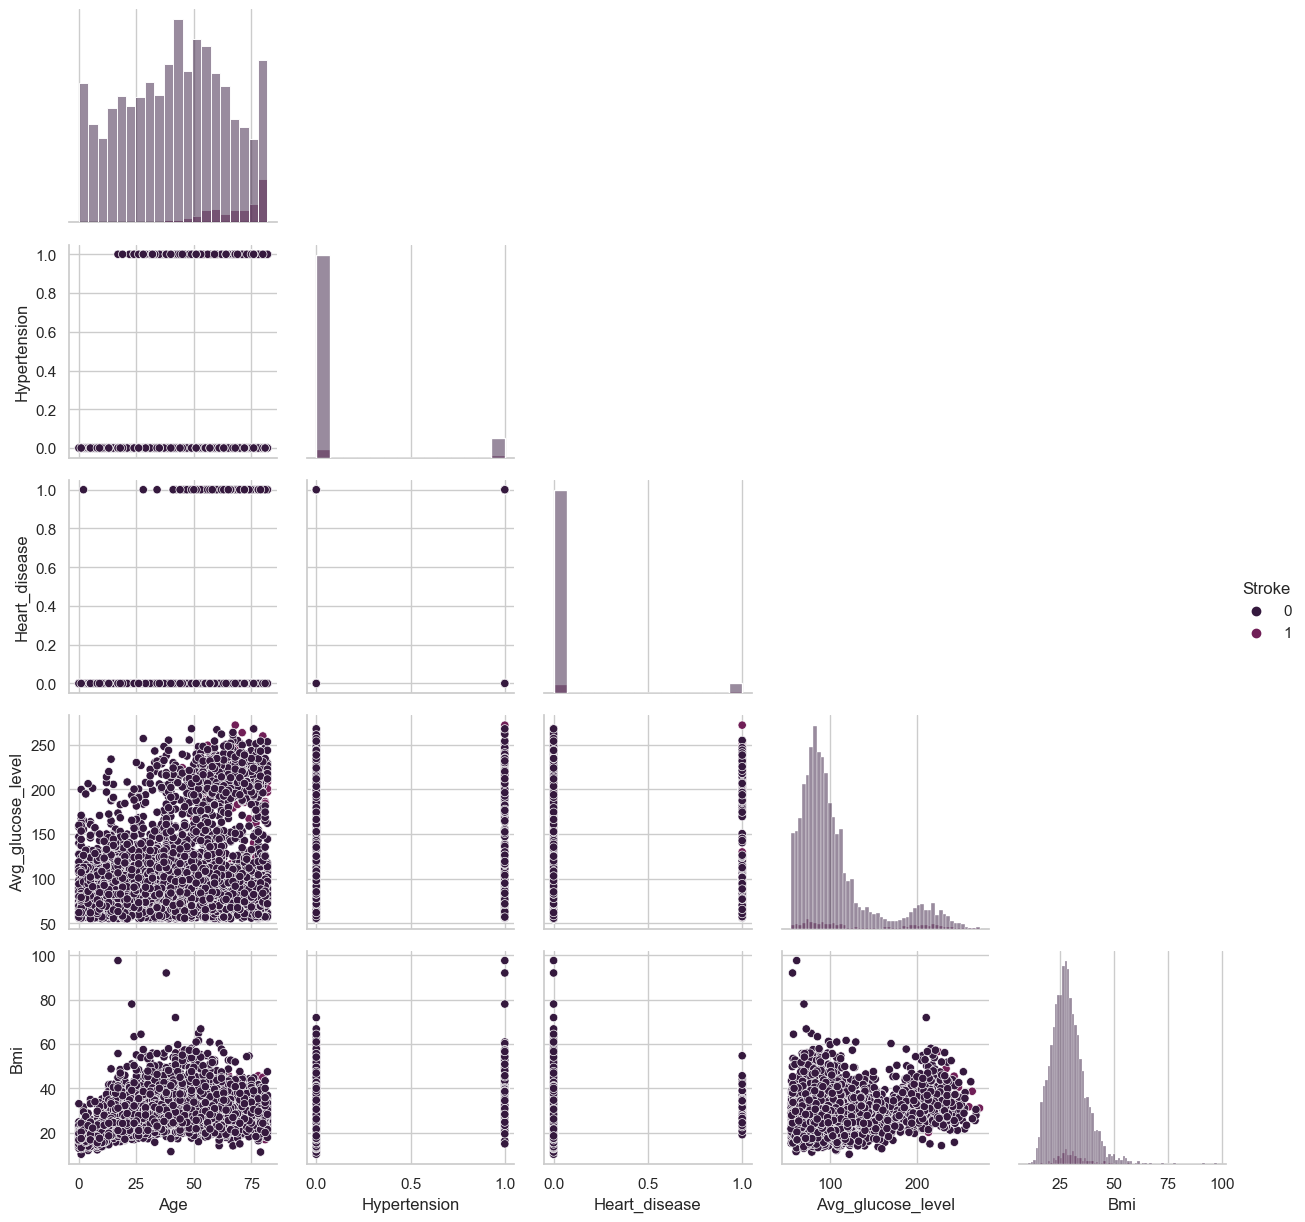

In [59]:
g = sns.PairGrid(stroke_data,
                 hue='Stroke',
                 diag_sharey=False, corner=True,
                 palette={1: 'C1', 0: 'C5'}
                 )
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.add_legend()

plt.show()